# Assignment 1. Music Century Classification

**Assignment Responsible**: Natalie Lang.

In this assignment, we will build models to predict which
**century** a piece of music was released.  We will be using the "YearPredictionMSD Data Set"
based on the Million Song Dataset. The data is available to download from the UCI 
Machine Learning Repository. Here are some links about the data:

- https://archive.ics.uci.edu/ml/datasets/yearpredictionmsd
- http://millionsongdataset.com/pages/tasks-demos/#yearrecognition

Note that you are note allowed to import additional packages **(especially not PyTorch)**. One of the objectives is to understand how the training procedure actually operates, before working with PyTorch's autograd engine which does it all for us.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Question 1. Data (21%)

Start by setting up a Google Colab notebook in which to do your work.
Since you are working with a partner, you might find this link helpful:

- https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb

The recommended way to work together is pair coding, where you and your partner are sitting together and writing code together. 

To process and read the data, we use the popular `pandas` package for data analysis.

In [2]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

Now that your notebook is set up, we can load the data into the notebook. The code below provides
two ways of loading the data: directly from the internet, or through mounting Google Drive.
The first method is easier but slower, and the second method is a bit involved at first, but
can save you time later on. You will need to mount Google Drive for later assignments, so we recommend
figuring how to do that now.

Here are some resources to help you get started:

- http.://colab.research.google.com/notebooks/io.ipynb

In [3]:
load_from_drive = False

if not load_from_drive:
  csv_path = "http://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip"
else:
  from google.colab import drive
  drive.mount('/content/gdrive')
  csv_path = '/content/drive/MyDrive/Deep Learning/Assignment 1/YearPredictionMSD.txt.zip' 

t_label = ["year"]
x_labels = ["var%d" % i for i in range(1, 91)]
df = pandas.read_csv(csv_path, names=t_label + x_labels)

Now that the data is loaded to your Colab notebook, you should be able to display the Pandas
DataFrame `df` as a table:

In [4]:
df.head()

,year,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var81,var82,var83,var84,var85,var86,var87,var88,var89,var90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


To set up our data for classification, we'll use the "year" field to represent
whether a song was released in the 20-th century. In our case `df["year"]` will be 1 if
the year was released after 2000, and 0 otherwise.

In [ ]:
df["year"] = df["year"].map(lambda x: int(x > 2000))

In [ ]:
df.head()

,year,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var81,var82,var83,var84,var85,var86,var87,var88,var89,var90
0,1,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,1,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,1,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,1,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,1,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


### Part (a) -- 7%

The data set description text asks us to respect the below train/test split to
avoid the "producer effect". That is, we want to make sure that no song from a single artist
ends up in both the training and test set.

Explain why it would be problematic to have
some songs from an artist in the training set, and other songs from the same artist in the
test set. (Hint: Remember that we want our test accuracy to predict how well the model
will perform in practice on a song it hasn't learned about.)

In [ ]:
df_train = df[:463715]
df_test = df[463715:]

# convert to numpy
train_xs = df_train[x_labels].to_numpy()
train_ts = df_train[t_label].to_numpy()
test_xs = df_test[x_labels].to_numpy()
test_ts = df_test[t_label].to_numpy()

# Write your explanation here



[1]

In Data Science & Machine/Deep learning, our main goal is to create an "Artificial Intelligence" model from a given dataset that can predict/classify/etc. a new *UNSEEN* Input. Due to that there are some important "rules" that we must consider when training and evaluating a model:
- We can't use the same dataset for model training and model evaluation, in that case our model can be easily overfitted, because the performance of your model on the test set is good. The purpose of testing on data that has not been seen during training is to allow you to properly evaluate whether overfitting is happening.
- It is much better to use different kinds of distibuted observation in each set (training and evaluation).

All of the above were born due the reason that our main achievement is to build a reliable machine learning model.

If we will not consider the above "rules" we may end up with a biased results, and we wil end up with a false impression of better model accuracy.
It can happen that the model you train learns "too much" or memorizes the training data, and then it performs poorly on unseen data. This is called "overfitting".

### Part (b) -- 7%

It can be beneficial to **normalize** the columns, so that each column (feature)
has the *same* mean and standard deviation.

In [ ]:
feature_means = df_train.mean()[1:].to_numpy() # the [1:] removes the mean of the "year" field
feature_stds  = df_train.std()[1:].to_numpy()

train_norm_xs = (train_xs - feature_means) / feature_stds
test_norm_xs = (test_xs - feature_means) / feature_stds

Notice how in our code, we normalized the test set using the *training data means and standard deviations*.
This is *not* a bug.

Explain why it would be improper to compute and use test set means
and standard deviations. (Hint: Remember what we want to use the test accuracy to measure.)

In [ ]:
# Write your explanation here



[2]

The reason is that we want to pretend that the test data is “new, unseen data.” We use the test dataset to get a good estimate of how our model performs on any new data.

When we center and scale a variable in the training data using the mean and standard deviations of that variable calculated on the training data, we are essentially creating a brand-new variable. Then we are doing, a regression/classification on that brand new variable.

To use that new variable to predict for the validation and/or test datasets, we have to create the same variable in those data sets. Subtracting a different number and dividing by a different number does not create the same variable.

**Example:**

Given a simple training set consisting of 3 samples with 1 feature column (let's call the feature column "height in cm"):

- Sample #1: 10 cm {class 2}
- Sample #2: 20 cm {class 2}
- Sample #3: 30 cm {class 1}

Given the data above, we end up with the below parameters:
- Mean = 20
- Standard Deviation = 8.164

If we use these parameters to standardize the same dataset, we get the following values:

- Sample #1: -1.21 cm {class 2}
- Sample #2: 0 cm {class 2}
- Sample #3: 1.21 cm {class 1}

Consider that the model has learned the following: It classifies samples with a standardized length value < 0.6 as class 2 (class 1 otherwise). Now, imagine we have 3 new unlabeled data points that you want to classify.

- Sample #4: 5 cm {class ?}
- Sample #5: 6 cm {class ?}
- Sample #6: 7 cm {class ?}

If we look at the “unstandardized height in cm” values in our training dataset, it is intuitive to say that all of these samples are likely belonging to class 2. However, if we standardize these by re-computing the standard deviation and and mean from the new data, we would get similar values as before (i.e., properties of a standard normal distribution) in the training set and our classifier would (probably incorrectly) assign the “class 2” label to the samples 4 and 5.

- Sample #4: -1.21 -> class 2
- Sample #5: 0 -> class 2
- Sample #6: 1.21 -> class 1

However, if we use the parameters from your “training set standardization, we will get the following standardized values

- Sample #4: -18.37
- Sample #5: -17.15
- Sample #6: -15.92

These values are more negative than the value of sample1 in the original training set, which makes much more sense now.

### Part (c) -- 7%

Finally, we'll move some of the data in our training set into a validation set.

Explain why we should limit how many times we use the test set, and that we should use the validation
set during the model building process.

In [ ]:
# shuffle the training set
reindex = np.random.permutation(len(train_xs))
train_xs = train_xs[reindex]
train_norm_xs = train_norm_xs[reindex]
train_ts = train_ts[reindex]

# use the first 50000 elements of `train_xs` as the validation set
train_xs, val_xs           = train_xs[50000:], train_xs[:50000]
train_norm_xs, val_norm_xs = train_norm_xs[50000:], train_norm_xs[:50000]
train_ts, val_ts           = train_ts[50000:], train_ts[:50000]

# Write your explanation here


[3]

The test set is generally what is used to evaluate competing models (For example on many Kaggle competitions, the validation set is released initially along with the training set and the actual test set is only released when the competition is about to close, and it is the result of the the model on the Test set that decides the winner). Many a times the validation set is used as the test set, but it is not good practice. The test set is generally well curated. It contains carefully sampled data that spans the various classes that the model would face, when used in the real world.

- Validation Dataset: The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. The evaluation becomes more biased as skill on the validation dataset is incorporated into the model configuration.

- Test Dataset: The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.

## Part 2. Classification (79%)

We will first build a *classification* model to perform decade classification.
These helper functions are written for you. All other code that you write in this section should be vectorized whenever possible (i.e., avoid unnecessary loops).

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))
    
def cross_entropy(t, y):
  delta = 1e-8 
  return -t * np.log(y) - (1 - t) * np.log(1 - y + delta) 

def cost(y, t):
  return np.mean(cross_entropy(t, y))

def get_accuracy(y, t):
  acc = 0
  N = 0
  for i in range(len(y)):
    N += 1
    if (y[i] >= 0.5 and t[i] == 1) or (y[i] < 0.5 and t[i] == 0):
      acc += 1
  return acc / N

### Part (a) -- 7%

Write a function `pred` that computes the prediction `y` based on logistic regression, i.e., a single layer with weights `w` and bias `b`. The output is given by: 
\begin{equation}
y = \sigma({\bf w}^T {\bf x} + b),
\end{equation}
where the value of $y$ is an estimate of the probability that the song is released in the current century, namely ${\rm year} =1$.

In [ ]:
def pred(w, b, X):
  """
  Returns the prediction `y` of the target based on the weights `w` and scalar bias `b`.

  Preconditions: np.shape(w) == (90,)
                 type(b) == float
                 np.shape(X) = (N, 90) for some N

  >>> pred(np.zeros(90), 1, np.ones([2, 90]))
  array([0.73105858, 0.73105858]) # It's okay if your output differs in the last decimals
  """
  # Your code goes here 
  return sigmoid(np.dot(w,np.transpose(X))+b) #check
  #return sigmoid(np.dot(w.T, X) + b)


### Part (b) -- 7%

Write a function `derivative_cost` that computes and returns the gradients 
$\frac{\partial\mathcal{L}}{\partial {\bf w}}$ and
$\frac{\partial\mathcal{L}}{\partial b}$. Here, `X` is the input, `y` is the prediction, and `t` is the true label.




In [ ]:
def derivative_cost(X, y, t):
  """
  Returns a tuple containing the gradients dLdw and dLdb.

  Precondition: np.shape(X) == (N, 90) for some N
                np.shape(y) == (N,)
                np.shape(t) == (N,)

  Postcondition: np.shape(dLdw) = (90,)
           type(dLdb) = float
  """
  # Your code goes here
  scalar=y-t 
  return tuple(np.dot(scalar,np.append(X,np.ones([len(t),1]),1))/len(t)) 


# **Explenation on Gradients**




**Add here an explaination on how the gradients are computed**:

Write your explanation here. Use Latex to write mathematical expressions. [Here is a brief tutorial on latex for notebooks.](https://www.math.ubc.ca/~pwalls/math-python/jupyter/latex/)



We will calculate the cross_entropy as the lost function-
${\mathcal{L}(x)=CrossEntropy(y)=\frac{1}{N}\sum_1^N(-t\log(y)-(1-t)\log(1-y))}$
$,y=\sigma(w^Tx+b)$

So we will get the derivative from the equations below: (1), (2), (3), (4), (5)

$\frac{\partial\mathcal{L}}{\partial b}=y-t$
,$\frac{\partial\mathcal{L}}{\partial w}=(y-t)(x_1,x_2,...,x_{90})^T$

(1) $y= \frac{1}{1+e^{-(w^Tx+b)}}= \frac{1}{1+e^{-f(z)}} => e^{-f(z)}=\frac{1-y}{y}=\frac{1}{y}-1$ whereas f(z)=z

(2) $\frac{\partial y}{\partial z} = f'(z)\frac{e^{-f(z)}}{(1+e^{-f(z)})^2}$

(3) $\frac{\partial \log(y)}{\partial z} =\frac{\partial y}{\partial z}\frac{1}{y}=f'(z)(1-y) $

(4)  $1-y=  \frac{e^{-f(z)}}{1+e^{-f(z)}}$

(5) $\frac{\partial \log(1-y)}{\partial z}=\frac{1+e^{-f(z)}}{e^{-f(z)}}\frac{e^{-f(z)}}{(1+e^{-f(z)})^2}f'(z)=-f'(z)y$


### Part (c) -- 7%

We can check that our derivative is implemented correctly using the finite difference rule. In 1D, the
finite difference rule tells us that for small $h$, we should have

$$\frac{f(x+h) - f(x)}{h} \approx f'(x)$$

Show that $\frac{\partial\mathcal{L}}{\partial b}$  is implement correctly
by comparing the result from `derivative_cost` with the empirical cost derivative computed using the above numerical approximation.


In [ ]:
# Your code goes here

'''
r1 = ...
r2 = ...
print("The analytical results is -", r1)
print("The algorithm results is - ", r2)
'''
y=np.array([0.73105858, 0.73105858])
h=0.0001
X=np.ones([2, 90])
y_h=pred(np.zeros(90), 1+h, X)
print(y_h)
t=np.ones(2)
r1 = (cost(y_h,t)-cost(y,t))/h
r2 = np.mean(derivative_cost(X,y,t))
print("The analytical results is -", round(r1,5))
print("The algorithm results is - ", round(r2,5))

[0.73107824 0.73107824]
The analytical results is - -0.26891
The algorithm results is -  -0.26894


### Part (d) -- 7%

Show that $\frac{\partial\mathcal{L}}{\partial {\bf w}}$  is implement correctly.

In [ ]:
# Your code goes here. You might find this below code helpful: but it's
# up to you to figure out how/why, and how to modify the code

'''
r1 = ...
r2 = ...
print("The analytical results is -", r1)
print("The algorithm results is - ", r2)
'''

h=0.0001
t=np.ones(2)
r1=np.zeros(90)
for index in range(90):
  w=np.zeros(90)
  w[index]=h
  y_h=pred(w, 1, X)
  r1[index]=(cost(y_h,t)-cost(y,t))/h
r2 = np.dot(y-t,X)/len(t)
print("The analytical results is -\n", r1)
print("The algorithm results is - \n", r2)

The analytical results is -
 [-0.26891285 -0.26891285 -0.26891285 -0.26891285 -0.26891285 -0.26891285
 -0.26891285 -0.26891285 -0.26891285 -0.26891285 -0.26891285 -0.26891285
 -0.26891285 -0.26891285 -0.26891285 -0.26891285 -0.26891285 -0.26891285
 -0.26891285 -0.26891285 -0.26891285 -0.26891285 -0.26891285 -0.26891285
 -0.26891285 -0.26891285 -0.26891285 -0.26891285 -0.26891285 -0.26891285
 -0.26891285 -0.26891285 -0.26891285 -0.26891285 -0.26891285 -0.26891285
 -0.26891285 -0.26891285 -0.26891285 -0.26891285 -0.26891285 -0.26891285
 -0.26891285 -0.26891285 -0.26891285 -0.26891285 -0.26891285 -0.26891285
 -0.26891285 -0.26891285 -0.26891285 -0.26891285 -0.26891285 -0.26891285
 -0.26891285 -0.26891285 -0.26891285 -0.26891285 -0.26891285 -0.26891285
 -0.26891285 -0.26891285 -0.26891285 -0.26891285 -0.26891285 -0.26891285
 -0.26891285 -0.26891285 -0.26891285 -0.26891285 -0.26891285 -0.26891285
 -0.26891285 -0.26891285 -0.26891285 -0.26891285 -0.26891285 -0.26891285
 -0.26891285 -0.268912

### Part (e) -- 7%

Now that you have a gradient function that works, we can actually run gradient descent. 
Complete the following code that will run stochastic: gradient descent training:

In [ ]:
def run_gradient_descent(w0, b0,train_norm_xs,train_ts,val_norm_xs,val_ts, mu=0.8, batch_size=100, max_iters=100):
  """Return the values of (w, b) after running gradient descent for max_iters.
  We use:
    - train_norm_xs and train_ts as the training set
    - val_norm_xs and val_ts as the test set
    - mu as the learning rate
    - (w0, b0) as the initial values of (w, b)

  Precondition: np.shape(w0) == (90,)
                type(b0) == float
 
  Postcondition: np.shape(w) == (90,)
                 type(b) == float
  """
  w = w0
  b = b0
  iter = 0

  val_acc_list=[]
  val_cost_list=[]
  while iter < max_iters:

    reindex = np.random.permutation(len(train_norm_xs))
    train_norm_xs = train_norm_xs[reindex]
    train_ts=train_ts[reindex]

    for i in range(0, len(train_norm_xs), batch_size): # iterate over each minibatch
      # minibatch that we are working with:
      X = train_norm_xs[i:(i + batch_size)]
      t = train_ts[i:(i + batch_size), 0]

      # since len(train_norm_xs) does not divide batch_size evenly, we will skip over
      # the "last" minibatch
      if np.shape(X)[0] != batch_size:
        continue

      # compute the prediction
      y=pred(w, b, X)
      scalar=y-t
      vec= np.append(w,b) -mu*np.dot(scalar,np.append(X,np.ones([len(t),1]),1))/len(t)
      # update w and b
      w=vec[0:90]
      b=vec[90]
      # increment the iteration count
      iter += 1
      # compute and print the *validation* loss and accuracy
      if (iter % 10 == 0):
        reindexval = np.random.permutation(len(val_norm_xs))
        val_norm_xs = val_norm_xs[reindexval]
        val_ts = val_ts[reindexval]
        vt=val_ts[0:3000]
        v = val_norm_xs[0:3000]
        prediction =pred(w,b,v)
        val_cost = cost(prediction,vt)
        val_cost_list.append(val_cost)
        val_acc = get_accuracy(prediction,vt)
        val_acc_list.append(val_acc*100)
        print("Iter %d. [Val Acc %.0f%%, Loss %f]" % (
                iter, val_acc * 100, val_cost))

      if iter >= max_iters:
        break

      # Think what parameters you should return for further use
  return_list= val_acc_list + list(vec)  +val_cost_list 
  return return_list

### Part (f) -- 7%

Call `run_gradient_descent` with the weights and biases all initialized to zero.
Show that if the learning rate $\mu$ is too small, then convergence is slow.
Also, show that if $\mu$ is too large, then the optimization algorirthm does not converge. The demonstration should be made using plots showing these effects.

Iter 10. [Val Acc 69%, Loss 0.784009]
Iter 20. [Val Acc 66%, Loss 0.901401]
Iter 30. [Val Acc 69%, Loss 0.893084]
Iter 40. [Val Acc 71%, Loss 0.872944]
Iter 50. [Val Acc 74%, Loss 0.918926]
Iter 60. [Val Acc 70%, Loss 0.899975]
Iter 70. [Val Acc 70%, Loss 0.884011]
Iter 80. [Val Acc 68%, Loss 0.947011]
Iter 90. [Val Acc 72%, Loss 0.955492]
Iter 100. [Val Acc 69%, Loss 0.895603]
Iter 10. [Val Acc 57%, Loss 2.383913]
Iter 20. [Val Acc 62%, Loss 1.739422]
Iter 30. [Val Acc 63%, Loss 1.980830]
Iter 40. [Val Acc 61%, Loss 2.181495]
Iter 50. [Val Acc 65%, Loss 1.949464]
Iter 60. [Val Acc 65%, Loss 2.023436]
Iter 70. [Val Acc 66%, Loss 1.537880]
Iter 80. [Val Acc 64%, Loss 2.355519]
Iter 90. [Val Acc 71%, Loss 1.658051]
Iter 100. [Val Acc 61%, Loss 2.302471]
Iter 10. [Val Acc 63%, Loss 0.693214]
Iter 20. [Val Acc 65%, Loss 0.693934]
Iter 30. [Val Acc 65%, Loss 0.694398]
Iter 40. [Val Acc 66%, Loss 0.695455]
Iter 50. [Val Acc 66%, Loss 0.696319]
Iter 60. [Val Acc 67%, Loss 0.696250]
Iter 70. [

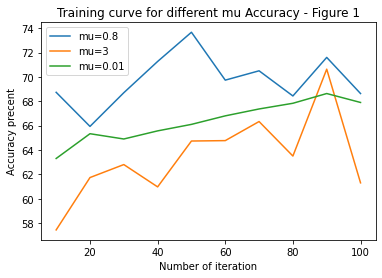

In [ ]:
#w0 = np.random.randn(90) # OLD
#b0 = np.random.randn(1)[0] # OLD

# Write your code here
b0=0
w0=np.zeros(90)
X_values = list(np.linspace(10,100,num=10))
Mu08= run_gradient_descent(w0, b0,train_norm_xs,train_ts,val_norm_xs,val_ts,mu=0.8)
acc_08=Mu08[0:10]
cost_08=Mu08[101:111]
Mu3= run_gradient_descent(w0, b0,train_norm_xs,train_ts,val_norm_xs,val_ts,mu=3)
acc_3 = Mu3[0:10]
cost_3=Mu3[101:111]
Mu001= run_gradient_descent(w0, b0,train_norm_xs,train_ts,val_norm_xs,val_ts,mu=0.01)
acc_001 = Mu001[0:10]
cost_001=Mu001[101:111]
plt.title("Training curve for different mu Accuracy - Figure 1")
plt.plot(X_values,acc_08, label="mu=0.8")
plt.plot(X_values,acc_3, label = "mu=3")
plt.plot(X_values,acc_001, label = "mu=0.01")
plt.ylabel("Accuracy precent")
plt.xlabel("Number of iteration")
plt.legend(loc='best')


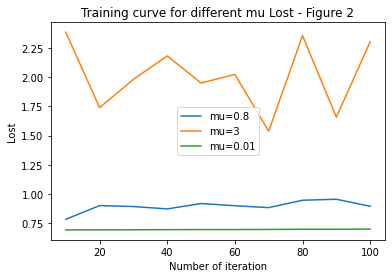

In [ ]:
plt.title("Training curve for different mu Lost - Figure 2")
plt.plot(X_values,cost_08, label="mu=0.8")
plt.plot(X_values,cost_3, label = "mu=3")
plt.plot(X_values,cost_001, label = "mu=0.01")
plt.ylabel("Lost")
plt.xlabel("Number of iteration")
plt.legend(loc='best')

We can see that when the initial values are zeros the values aren't changing much for small value of $\mu$ but for big value of $\mu$ the values change randomly. The phenomenon for small value of $\mu$ happens because when initialing the values of the weights to zero the output unrelated to the input.

Iter 10. [Val Acc 58%, Loss 2.298053]
Iter 20. [Val Acc 61%, Loss 1.869171]
Iter 30. [Val Acc 64%, Loss 1.587886]
Iter 40. [Val Acc 62%, Loss 1.308652]
Iter 50. [Val Acc 66%, Loss 1.202100]
Iter 60. [Val Acc 67%, Loss 1.124784]
Iter 70. [Val Acc 69%, Loss 0.986883]
Iter 80. [Val Acc 69%, Loss 1.000149]
Iter 90. [Val Acc 71%, Loss 0.976948]
Iter 100. [Val Acc 69%, Loss 0.965916]
Iter 10. [Val Acc 59%, Loss 2.412379]
Iter 20. [Val Acc 60%, Loss 2.895881]
Iter 30. [Val Acc 61%, Loss 2.016247]
Iter 40. [Val Acc 65%, Loss 1.782298]
Iter 50. [Val Acc 67%, Loss 1.650270]
Iter 60. [Val Acc 69%, Loss 1.430154]
Iter 70. [Val Acc 67%, Loss 1.326167]
Iter 80. [Val Acc 67%, Loss 1.675136]
Iter 90. [Val Acc 67%, Loss 2.022768]
Iter 100. [Val Acc 66%, Loss 1.645723]
Iter 10. [Val Acc 51%, Loss 3.075324]
Iter 20. [Val Acc 52%, Loss 3.072815]
Iter 30. [Val Acc 49%, Loss 3.006108]
Iter 40. [Val Acc 53%, Loss 3.016963]
Iter 50. [Val Acc 51%, Loss 2.990286]
Iter 60. [Val Acc 50%, Loss 3.002062]
Iter 70. [

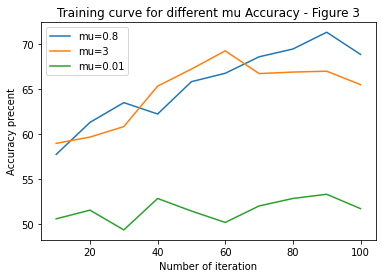

In [ ]:
w0 = np.random.randn(90)
b0 = np.random.randn(1)[0]

# Write your code here
Mu08= run_gradient_descent(w0, b0,train_norm_xs,train_ts,val_norm_xs,val_ts,mu=0.8)
acc_08=Mu08[0:10]
cost_08=Mu08[101:111]
Mu3= run_gradient_descent(w0, b0,train_norm_xs,train_ts,val_norm_xs,val_ts,mu=3)
acc_3 = Mu3[0:10]
cost_3=Mu3[101:111]
Mu001= run_gradient_descent(w0, b0,train_norm_xs,train_ts,val_norm_xs,val_ts,mu=0.01)
acc_001 = Mu001[0:10]
cost_001=Mu001[101:111]
plt.title("Training curve for different mu Accuracy - Figure 3")
plt.plot(X_values,acc_08, label="mu=0.8")
plt.plot(X_values,acc_3, label = "mu=3")
plt.plot(X_values,acc_001, label = "mu=0.01")
plt.ylabel("Accuracy precent")
plt.xlabel("Number of iteration")
plt.legend(loc='best')

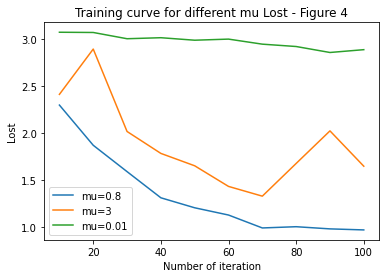

In [ ]:
plt.title("Training curve for different mu Lost - Figure 4")
plt.plot(X_values,cost_08, label="mu=0.8")
plt.plot(X_values,cost_3, label = "mu=3")
plt.plot(X_values,cost_001, label = "mu=0.01")
plt.ylabel("Lost")
plt.xlabel("Number of iteration")
plt.legend(loc='best')

**Explain and discuss your results here:**

We can see that the higher the $\mu$ is the Gradient decent doesnt convarge and the lower $\mu$ is the convergance is much slower. when $\mu$'s rate is in the middle - the convergance is consistent. Therefore, we chose $\mu$ = 0.8 

From Figures 2 & 4 we can conclude that with the right $\mu$ the decrease converge.

From Figures 1 & 3 we can conclude that the accuracy getting higher, till it reaches stable stage. Hence, the number of iterations might be to big.

### Part (g) -- 7%

Find the optimial value of ${\bf w}$ and $b$ using your code. Explain how you chose
the learning rate $\mu$ and the batch size. Show plots demostrating good and bad behaviours.

Iter 10. [Val Acc 58%, Loss 1.648530]
Iter 20. [Val Acc 63%, Loss 1.351654]
Iter 30. [Val Acc 64%, Loss 1.145531]
Iter 40. [Val Acc 68%, Loss 1.029340]
Iter 50. [Val Acc 70%, Loss 0.970472]
Iter 60. [Val Acc 69%, Loss 0.934882]
Iter 70. [Val Acc 71%, Loss 0.926507]
Iter 80. [Val Acc 72%, Loss 0.904266]
Iter 90. [Val Acc 72%, Loss 0.890954]
Iter 100. [Val Acc 72%, Loss 0.901266]
Iter 10. [Val Acc 61%, Loss 1.812112]
Iter 20. [Val Acc 62%, Loss 1.486403]
Iter 30. [Val Acc 66%, Loss 1.350255]
Iter 40. [Val Acc 66%, Loss 1.201260]
Iter 50. [Val Acc 68%, Loss 1.090087]
Iter 60. [Val Acc 68%, Loss 1.098983]
Iter 70. [Val Acc 69%, Loss 0.999377]
Iter 80. [Val Acc 69%, Loss 0.955147]
Iter 90. [Val Acc 70%, Loss 1.037440]
Iter 100. [Val Acc 71%, Loss 0.977841]
Iter 10. [Val Acc 58%, Loss 2.905811]
Iter 20. [Val Acc 58%, Loss 2.329582]
Iter 30. [Val Acc 60%, Loss 2.405800]
Iter 40. [Val Acc 62%, Loss 2.002791]
Iter 50. [Val Acc 60%, Loss 2.721441]
Iter 60. [Val Acc 62%, Loss 2.098635]
Iter 70. [

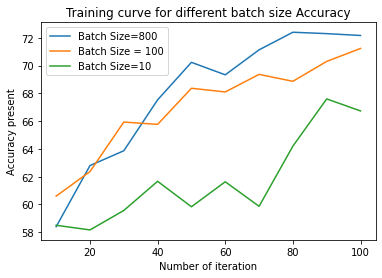

In [ ]:
w0 = np.random.randn(90)
b0 = np.random.randn(1)[0]

# Write your code here
BatchSize800= run_gradient_descent(w0, b0,train_norm_xs,train_ts,val_norm_xs,val_ts,batch_size=800)
Batch800 = BatchSize800[0:10]
BatchLost800 = BatchSize800[101:111]
BatchSize100= run_gradient_descent(w0, b0,train_norm_xs,train_ts,val_norm_xs,val_ts)
Batch100 = BatchSize100[0:10]
BatchLost100 = BatchSize100[101:111]
BatchSize10= run_gradient_descent(w0, b0,train_norm_xs,train_ts,val_norm_xs,val_ts, batch_size=10)
Batch10 = BatchSize10[0:10]
BatchLost10 = BatchSize10[101:111]
w=BatchSize800[10:100]
b=BatchSize800[100]
print(b)
print(w)
plt.title("Training curve for different batch size Accuracy")
plt.plot(X_values,Batch800, label="Batch Size=800")
plt.plot(X_values,Batch100, label = "Batch Size = 100")
plt.plot(X_values,Batch10, label = "Batch Size=10")
plt.ylabel("Accuracy present")
plt.xlabel("Number of iteration")
plt.legend(loc='best')


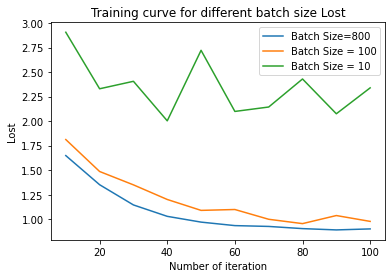

In [ ]:
plt.title("Training curve for different batch size Lost")
plt.plot(X_values,BatchLost800, label="Batch Size=800")
plt.plot(X_values,BatchLost100, label = "Batch Size = 100")
plt.plot(X_values,BatchLost10, label = "Batch Size = 10")
plt.ylabel("Lost")
plt.xlabel("Number of iteration")
plt.legend(loc='best')

**Explain and discuss your results here:**

We can see that with Batch size = 800 and Batch size = 100 the difference is small. However when batch size = 800 the performance is better. We can also notice that when the Batch size = 10 the result diverges.
The optimal $w$ and $b$ are given by the optimal $\mu$ and optimal batch size. 

We can conclude from the Lost function graph that when the Batch is bigger the more stable the lost function is, for batch size = 800 it is much more stable then when batch size = 100, due to that we chose batch size = 800. 

It has been observed in practice that when using a larger batch there is a significant degradation in the quality of the model, as measured by its ability to generalize.

It is important to mention that the lack of generalization ability is due to the fact that large-batch methods tend to converge to sharp minimizers of the training function.

### Part (h) -- 15%

Using the values of `w` and `b` from part (g), compute your training accuracy, validation accuracy,
and test accuracy. Are there any differences between those three values? If so, why?

In [ ]:
# Write your code here

predictionTrain=pred(w,b,train_norm_xs)
predictionTest=pred(w,b,test_norm_xs)
predictionVal=pred(w,b,val_norm_xs)
train_acc = get_accuracy(predictionTrain,train_ts)
val_acc =  get_accuracy(predictionTest,test_ts)
test_acc =  get_accuracy(predictionVal,val_ts)

print('train_acc = ', train_acc, ' val_acc = ', val_acc, ' test_acc = ', test_acc)


train_acc =  0.7178009015868412  val_acc =  0.7104396668603525  test_acc =  0.7178


**Explain and discuss your results here:**

We can see from the above computation that the difference between the train accuracy validation accuracy and test accuracy isn't big, therefore we colclude that the training process was good! We would expect that the value of train_acc (i.e training accuracy) variable will be the higher.

if the training was bad we would expect that the test accuracy would be much lower then the training and validation accuracy.

### Part (i) -- 15%

Writing a classifier like this is instructive, and helps you understand what happens when
we train a model. However, in practice, we rarely write model building and training code
from scratch. Instead, we typically use one of the well-tested libraries available in a package.

Use `sklearn.linear_model.LogisticRegression` to build a linear classifier, and make predictions about the test set. Start by reading the
[API documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

Compute the training, validation and test accuracy of this model.

In [ ]:
import sklearn.linear_model

model =sklearn.linear_model.LogisticRegression(multi_class='multinomial') 
model.fit(train_norm_xs,train_ts) 
train_acc = get_accuracy(model.predict(train_norm_xs), train_ts)
val_acc = get_accuracy(model.predict(val_norm_xs), val_ts)
test_acc = get_accuracy(model.predict(test_norm_xs), test_ts) 

print('train_acc = ', train_acc, ' val_acc = ', val_acc, ' test_acc = ', test_acc)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train_acc =  0.7331907230823151  val_acc =  0.73086  test_acc =  0.7269998063141584


**This parts helps by checking if the code worked.**
**Check if you get similar results, if not repair your code**